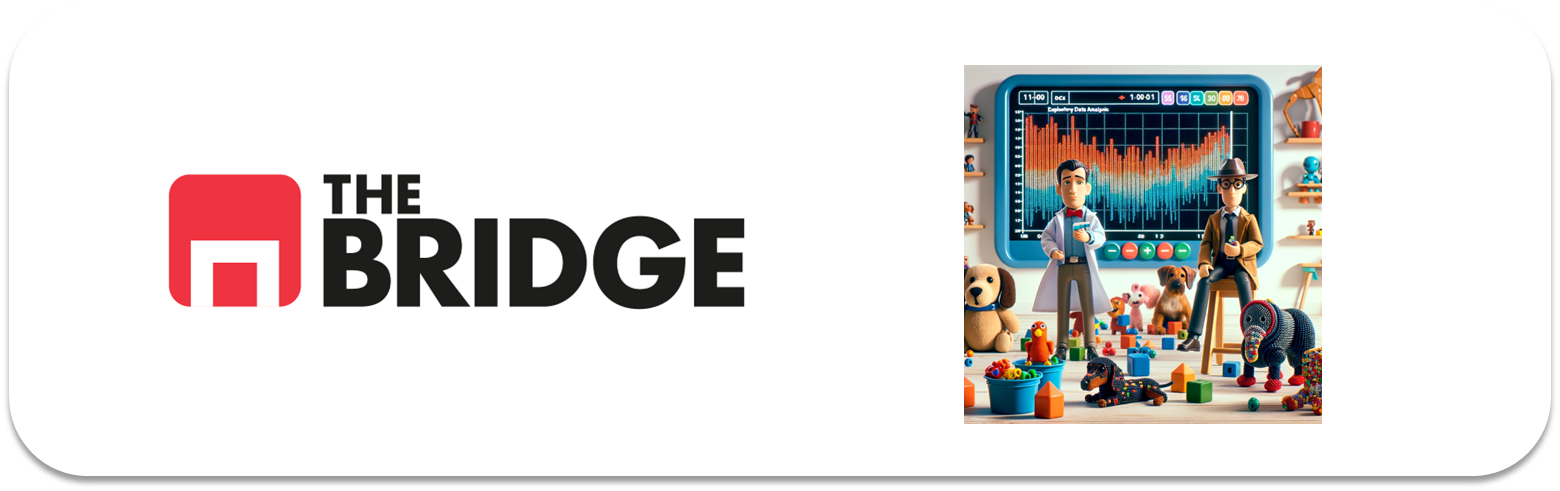

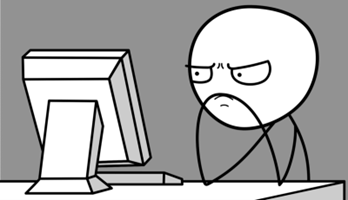

Para ejercitarte y afianzar lo aprendido sobre análisis multivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot

### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [2]:
df_admisiones = pd.read_csv("./data/admission_data.csv")
print(df_admisiones.info())
print(df_admisiones.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12763 entries, 0 to 12762
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12763 non-null  int64 
 1   Year        12763 non-null  int64 
 2   Major       12763 non-null  object
 3   Gender      12763 non-null  object
 4   Admission   12763 non-null  object
dtypes: int64(2), object(3)
memory usage: 498.7+ KB
None
   Unnamed: 0  Year                    Major Gender Admission
0           0  1973       School of Medicine      F  Rejected
1           1  1973  Department of Economics      M  Accepted
2           2  1973                    Other      F  Accepted
3           3  1973                    Other      M  Accepted
4           4  1973                    Other      M  Rejected


In [3]:
df_admisiones =df_admisiones.drop(columns=["Unnamed: 0"])

### Ejercicio 2

Realiza los análisis multivariante que consideres necesarios para contestar apoyándote en los datos a las preguntas: ¿Existe algún departamenteo específico donde pudieramos hablar de discriminación?¿Están estos resultados en consonancia con lo obtenido en el análisis bivariante de admisiones y género? 

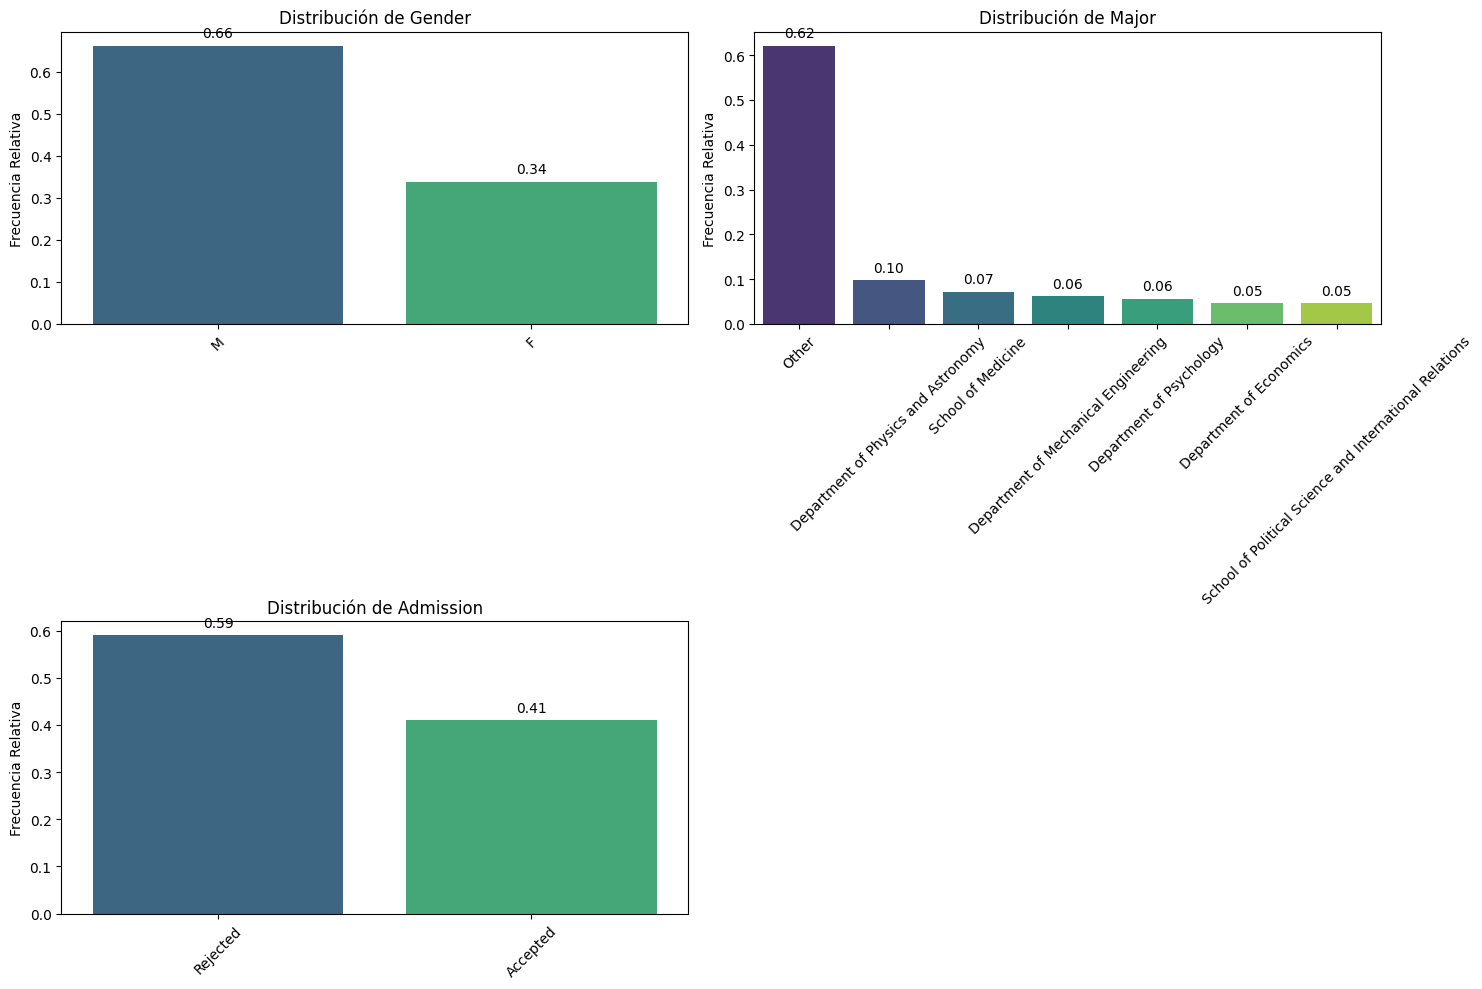

In [24]:
pinta_distribucion_categoricas(df_admisiones,["Gender","Major","Admission"], relativa= True, mostrar_valores= True)

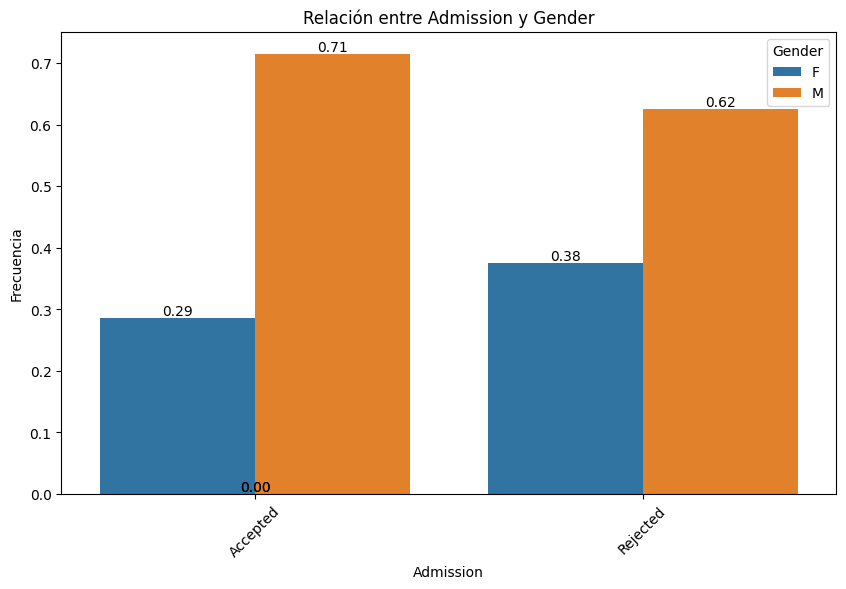

In [25]:
plot_categorical_relationship_fin(df_admisiones,"Admission","Gender", relative_freq= True, show_values= True)

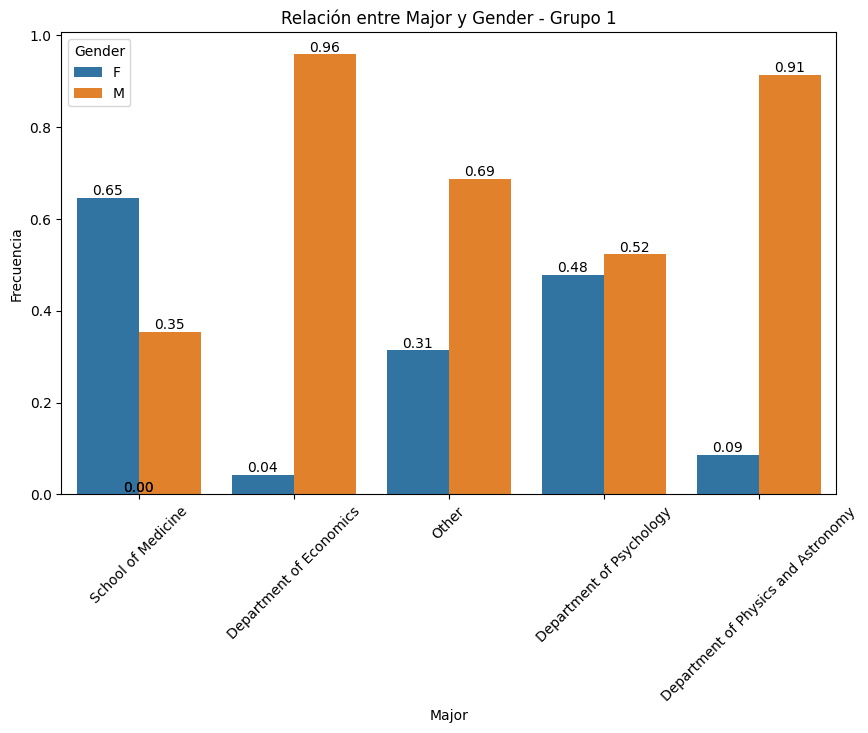

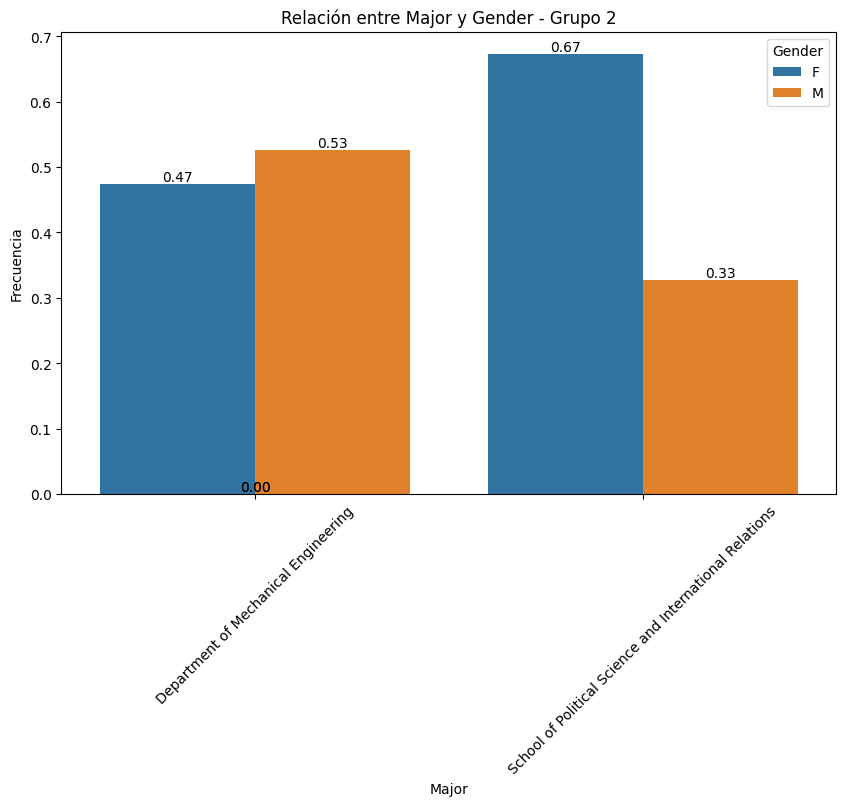

In [26]:
plot_categorical_relationship_fin(df_admisiones,"Major","Gender", relative_freq= True, show_values= True)

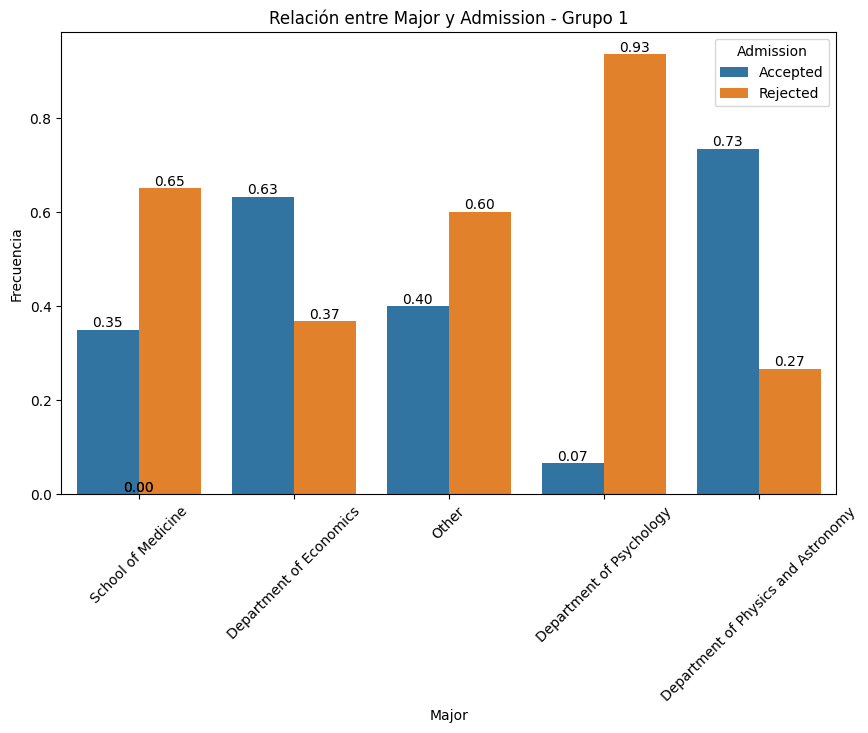

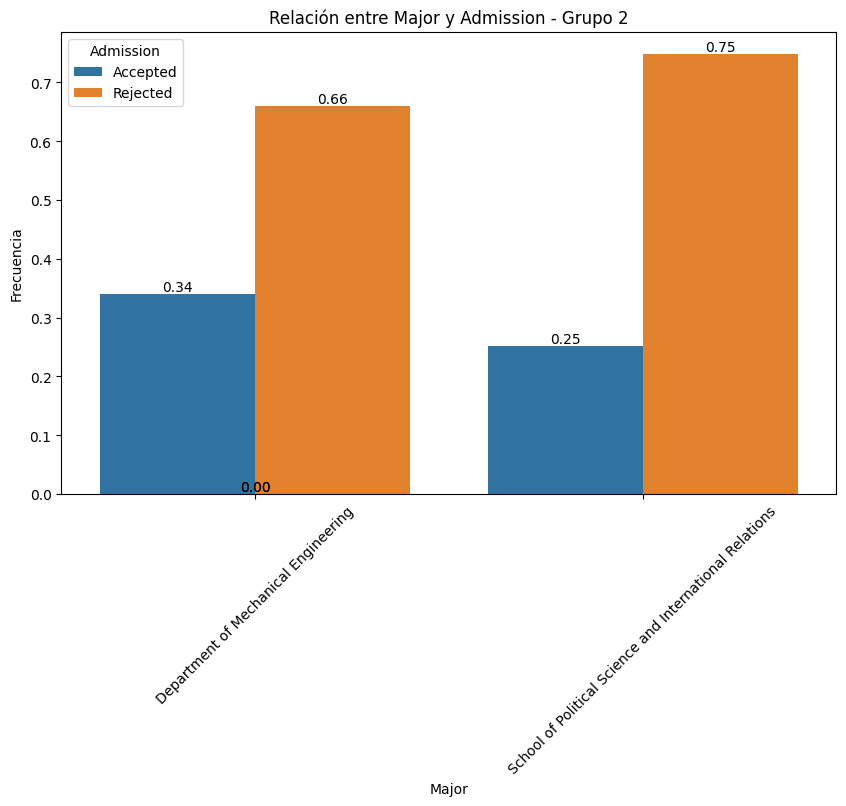

In [29]:
plot_categorical_relationship_fin(df_admisiones,"Major","Admission", relative_freq= True, show_values= True)

En School of Medicine, la tasa de admision es bastante mayor en mujeres. Sin embargo, en Economics y Physics, son los hombres. 
En el análisis bivariante vemos que los hombres son admitidos con mas frecuencia de forma global, y el análisis multivariante confirma esta tendencia en departamentos concretos como Economía y Física, pero tambien se ve que en otros como Medicina, pasa lo contrario, hay más mujeres admitidas. Esto muestra que puede haber una discriminación generalizada.

### Ejercicio 3

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [30]:
df_tips = pd.read_csv("./data/tips.csv")
print(df_tips.info())
print(df_tips.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB
None
   Unnamed: 0  total_bill   tip     sex smoker  day    time  size
0           0       16.99  1.01  Female     No  Sun  Dinner     2
1           1       10.34  1.66    Male     No  Sun  Dinner     3
2           2       21.01  3.50    Male     No  Sun  Dinner     3
3           3       23.68  3.31    Male     No  Sun  Dinner     2
4           4       24.59  3.61  Female     No  Sun  Dinner     4


In [31]:
df_tips =df_tips.drop(columns=["Unnamed: 0"])

### Ejercicio 4

Carga el dataset de accidentes que conoces de la unidad anterior y que se encuentra en la ruta "./data/car_crashes.csv", deshazte de las columnas innecesarias y renombra la que contiene las iniciales de los estados a "state"

In [33]:
df_cars = pd.read_csv("./data/car_crashes.csv", sep='|')
print(df_cars.info())
print(df_cars.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      51 non-null     int64  
 1   total           51 non-null     float64
 2   speeding        51 non-null     float64
 3   alcohol         51 non-null     float64
 4   not_distracted  51 non-null     float64
 5   no_previous     51 non-null     float64
 6   ins_premium     51 non-null     float64
 7   ins_losses      51 non-null     float64
 8   abbrev          51 non-null     object 
dtypes: float64(7), int64(1), object(1)
memory usage: 3.7+ KB
None
   Unnamed: 0  total  speeding  alcohol  not_distracted  no_previous  \
0           0   18.8     7.332    5.640          18.048       15.040   
1           1   18.1     7.421    4.525          16.290       17.014   
2           2   18.6     6.510    5.208          15.624       17.856   
3           3   22.4     4.032    5.824         

In [34]:
df_cars = df_cars.drop(columns=["Unnamed: 0"])

In [35]:
df_cars = df_cars.rename(columns={"abbrev": "state"})

### Ejercicio 5

Realiza una análisis de todas las posibles correlaciones dos a dos, de forma numérica primero y luego empleado un heatmap y un pairplot de seaborn. ¿Qué variables tienen o aparentemente tienen una mayor correlación con "total?

In [36]:
corr_matrix = df_cars.corr(numeric_only= True) 
corr_matrix

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


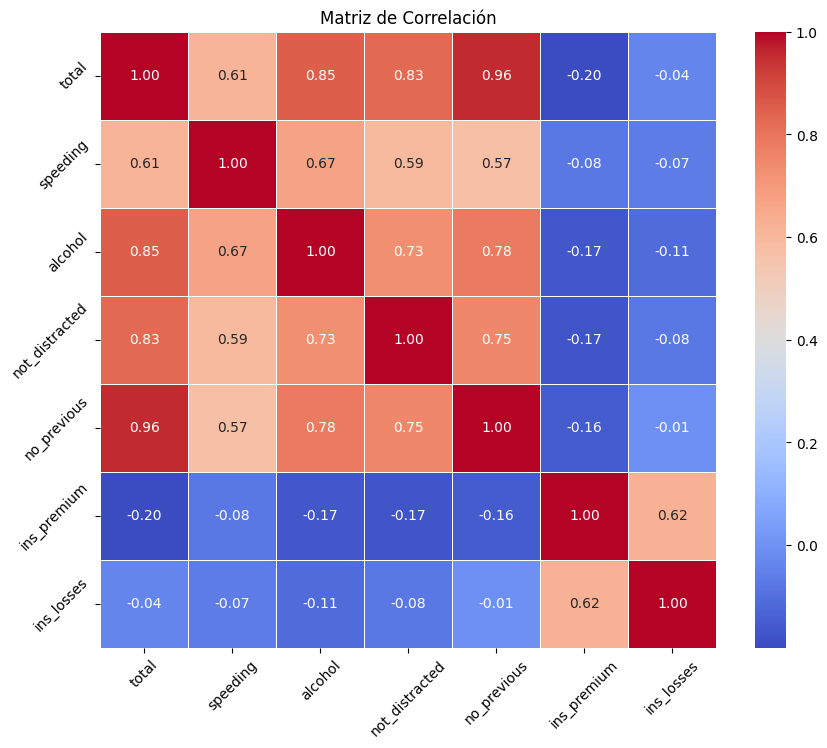

In [37]:
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5)
plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  
plt.yticks(rotation=45)  

plt.show()


Las variables que muestran mas correlación con 'total' (accidentes) son:
- 'no_previous' - 0.96: fuerte correlación positiva con el nº de personas sin accidentes anteriores.
- 'alcohol' - 0.85: alta correlación positiva con el alcohol
- 'not_distracted" - 0.83: también alta correlación

### Ejercicio 6

Realiza un análisis multivariante entre las variables numéricas "total", "alcohol", "speeding". ¿Puedes sacar alguna conclusión interesante?

In [38]:
columnas = df_cars[["total", "alcohol", "speeding"]]

corr_columnas = columnas.corr()
print(corr_columnas)

             total   alcohol  speeding
total     1.000000  0.852613  0.611548
alcohol   0.852613  1.000000  0.669719
speeding  0.611548  0.669719  1.000000


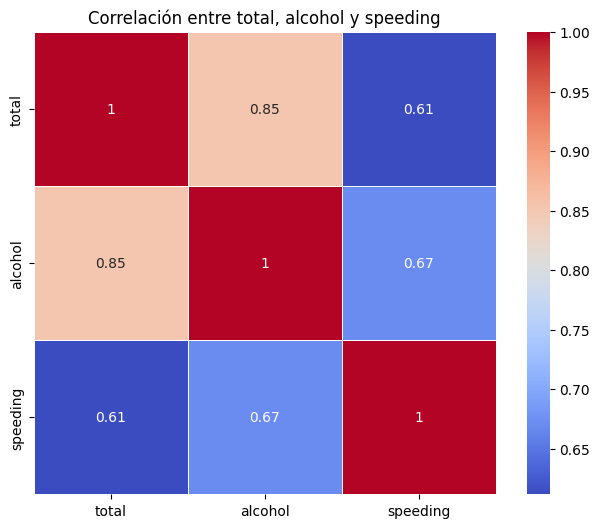

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_columnas, annot=True, cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlación entre total, alcohol y speeding")
plt.show()

Total y alcohol tienen correlacion positiva muy fuerte (0.85), lo que indica que en los estados donde hay más accidentes, también se relacionan con el alcohol. Total y speeding también, aunque moderada (0.61), lo que indica que los excesos de velocidad también se relacionan con más accidentes. Alcohol y speeding es positiva moderada (0.67), estos dos factores suelen coincidir. 